In [5]:
import time

import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
%load_ext autoreload
%autoreload 2
import os
from toolsets.file_io import get_file_list
import pandas as pd
from toolsets.constants import single_charged_adduct_mass, iso_steps
from collections import Counter
# mzml_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/srm_1958/mzml'
# master_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/srm_1958'
# pl_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/srm_1958/pl'
# eic_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/srm_1958/some_eic'
# msdial_pl_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/srm_1958/msdial_peak_list'
from scipy.stats import pearsonr
import toolsets.raw_data_scaffold as rds
# for f in [mzml_dir, pl_dir, eic_dir, msdial_pl_dir]:
#     if os.path.exists(f)==False:
#         os.makedirs(f)
from toolsets.file_io import readin_peak_list
import toolsets.T_rex as trx
import toolsets.ff_droup as ff
from toolsets.spectra_plotter import ms2_plot
import toolsets.spectra_operations as so
from toolsets.search import quick_search_values, quick_search_sorted, string_search, search_feature, search_feature_msdial
from toolsets.helpers import specify_column
from toolsets.file_io import prepare_sample_list
from toolsets.std_list_prep import calculate_precursormz
master_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/exposome_negBA'
msdial_dir = '/Volumes/scratch/Fanzhou/exposome_negBA/msdial_result'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mega_mona = pd.read_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/curated_library/csv/neg_orbi_filtered.csv')

In [3]:
istd = pd.read_csv(os.path.join(master_dir, 'istd_info.csv'))

In [8]:
mzml_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/exposome_negBA/612_mzml/'
pl_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/exposome_negBA/peak_list/negBA_612'

In [9]:
file_list = get_file_list(mzml_dir, '.mzML', with_tail=False)

In [10]:
samples, qcs, blks =prepare_sample_list(file_list)

In [154]:
samples[1]

'Exposome_Yendry539_MX743739_negBA_612-200-12'

In [163]:
ms1, ms2= rds.read_mzml(samples[1], mzml_dir)
mass_sorted, intensity_sorted, index_sorted, rt_list = trx.build_index(ms1)

In [221]:
feature_temp = trx.get_features(mass_sorted, intensity_sorted, index_sorted, rt_list, base_name= ms1.iloc[0]['base_name'], n_neighbor=2, intensity_threshold=10000)

In [230]:
tt

,name,precursor_mz,adduct,rt_apex,rt_observed,inchikey,msms
0,1_CUDA iSTD,339.26532,[M-H]-,0.249,0.205,HPTJABJPZMULFH-UHFFFAOYSA-N,55.43203\t8621\n55.60109\t9703\n59.01397\t1478...
1,1_D3-Acetaminophen iSTD,153.07488,[M-H]-,0.279,NaN,,
2,1_D4-Niacin iSTD,126.04986,[M-H]-,0.976,1.066,,58.15605\t3017\n65.99826\t5173\n80.04742\t5776...
3,1_D5-Phenylacetylglutamine iSTD,268.13511,[M-H]-,1.484,1.499,,52.13557\t39388\n58.02951\t129811\n58.59655\t4...
4,1_Val-Tyr-Val iSTD,378.20344,[M-H]-,1.663,1.668,ZNGPROMGGGFOAA-JYJNAYRXSA-N,52.01887\t8708\n58.02957\t22419\n60.93793\t523...
5,1_D10-Leucine iSTD,140.15012,[M-H]-,1.691,NaN,ROHFNLRQFUQHCH-SHJFKSRGSA-N,61.40874\t3514\n61.4571\t2879\n62.2696\t3495\n...
6,1_D10-Isoleucine iSTD,140.15012,[M-H]-,1.733,NaN,,59.766\t2962\n65.01449\t18390\n89.01448\t25487...
7,1_D5-Threonine iSTD,123.08235,[M-H]-,1.989,1.999,AYFVYJQAPQTCCC-WKHZCAFQSA-N,52.56099\t3258\n56.2435\t2974\n72.00913\t21006...
8,1_D5-L-Glutamine iSTD,150.09325,[M-H]-,2.078,2.092,ZDXPYRJPNDTMRX-NKXUJHECSA-N,52.15825\t37720\n59.03585\t111721\n59.04699\t8...
9,1_D3-DL-Glutamic acid iSTD,149.06471,[M-H]-,2.125,2.146,WHUUTDBJXJRKMK-UHVFUKFASA-N,68.41961\t7891\n71.01382\t8891\n75.03102\t9104...


In [245]:
search_feature(feature_temp,126.04986)

,precursor_mz,rt_apex,rt_start,rt_end,ms1_intensity,ms1_intensity_smoothed,n_scnas,ms1_scan_range,ion_trace_center,reci_snr,ion_trace_offset,base_name
3118,126.049815,1.047679,0.989701,1.119348,25270.310547,21315.358984,29.0,"[219, 232, 247]",126.049805,0.064765,0.000402,Exposome_Yendry539_MX743739_negBA_612-200-12.mzML


In [216]:
tt = trx.detect_all_peaks(intensity_list, n_neighbor=1, intensity_threshold=10000)

In [217]:
tt

([array([220, 231, 242])], array([0.0492003]), array([21953.34830729]))

# Parse seed bin rt time

In [97]:
# import yaml
# with open('/Users/fanzhoukong/Downloads/5m_hilic-orbitrap-beh_amide-negative-UK_20230920.yml', 'r') as file:
#     yaml_data = yaml.safe_load(file)
#
# # Step 2: Convert the YAML data to a suitable format (assuming it's a list of dictionaries)
# # This step depends heavily on the structure of your YAML file.
# # You might need to adjust the code to match your specific data structure.
#
# # Step 3: Create a DataFrame
# name = []
# precursor_mz = []
# adduct = []
# rt_apex = []
# inchikey = []
# msms = []
# for row in yaml_data['config'][0]['targets']:
#     name.append(row['identifier'])
#     precursor_mz.append(row['accurateMass'])
#     adduct.append(row['adduct'])
#     rt_apex.append(row['retentionTime'])
#     inchikey.append(row['inchikey'])
#     msms.append(so.convert_msdial_to_string(row['msms']))
# istd_seed = pd.DataFrame(zip(name, precursor_mz, adduct, rt_apex, inchikey, msms), columns=['name', 'precursor_mz', 'adduct', 'rt_apex', 'inchikey', 'msms'])
# istd_seed.to_csv(os.path.join(master_dir, 'istd_seed.csv'), index = False)

# denoising attempt with MSDial data

In [318]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
msdial_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/exposome_negBA/msdial_result/alignment'

In [283]:
istd_seed = pd.read_csv(os.path.join(master_dir, 'istd_seed_nolu.csv'))

In [284]:
from toolsets.file_io import readin_peak_list
from toolsets.search import search_feature_msdial

In [285]:
_alignment_df_612= readin_peak_list(os.path.join(msdial_dir, '612.txt'), alighment=True)
IE_alignment = readin_peak_list(os.path.join(msdial_dir, 'dnl.txt'), alighment=True)

In [279]:
from toolsets.feature_utilities import find_istd_info_msdial

In [287]:
def find_istd_rts(istd_seed, alignment):
    istd_seed_return =istd_seed.copy()
    alignment.sort_values(by = 'Average Mz', ascending=True, inplace = True)
    rt_matched = []
    for index, row in istd_seed.iterrows():
        matched_temp = search_feature_msdial(alignment, pmz = row['precursor_mz'], rt = row['rt_apex'], pmz_sorted=True, rt_error=15)
        if len(matched_temp)==1:
            rt_matched.append(matched_temp.iloc[0]['Average Rt(min)'])
        else:
            rt_matched.append(np.NAN)
    istd_seed_return.insert(4, 'rt_observed', rt_matched)
    return(istd_seed_return)



In [288]:
istd_612 = find_istd_rts(istd_seed, _alignment_df_612)

In [291]:
istd_ie = find_istd_rts(istd_seed, IE_alignment)

In [336]:
def build_model(istd_df):
    rt_sug = np.array(istd_df['rt_apex'])
    rt_obv = np.array(istd_df['rt_observed'])
    rt_sug =  rt_sug[np.logical_not(np.isnan(rt_obv))]
    rt_obv =  rt_obv[np.logical_not(np.isnan(rt_obv))]
    offset = np.array([x-y for x,y in zip(rt_sug, rt_obv)])#use predicted_offset+obv to get suggested rt
    rf = RandomForestRegressor()
    rf.fit(rt_obv.reshape(-1, 1), offset)
    return(rf)

In [342]:
def rt_correction(istd_df, alignment):
    rf = build_model(istd_df)
    predicted_offset = rf.predict(np.array(alignment['Average Rt(min)']).reshape(-1, 1))
    alignment['rt_corrected']=[x+y for x, y in zip(alignment['Average Rt(min)'], predicted_offset)]
    return alignment

In [ ]:
_alignment_df_612

In [344]:
IE_alignment = rt_correction(istd_ie, IE_alignment)

In [346]:
IE_msms = IE_alignment[IE_alignment['MS/MS assigned']==True]

In [411]:
reference_msms = []
df = pd.DataFrame()
_alignment_df_612.sort_values(by = 'Average Mz', ascending=True, inplace=True)
for index, row in IE_msms.iterrows():
    matched = search_feature_msdial(_alignment_df_612, pmz = row['Average Mz'], rt=row['rt_corrected'], mass_error=0.005, rt_error=3, pmz_sorted=True)
    if len(matched)==1:
        df = pd.concat([df, pd.DataFrame([matched.iloc[0]])], ignore_index=True)
        reference_msms.append(so.convert_msdial_to_string(row['MS/MS spectrum']) )
df['msms']=reference_msms

In [6]:
mz_rt_lib = pd.read_csv(os.path.join(master_dir, '5m_hilic_orbitrap_beh_amide_negative_BINS.csv'))

In [366]:
mz_rt_lib.sort_values(by = 'precursor_mass', ascending=True, inplace=True)

In [7]:
mz_rt_lib=mz_rt_lib[~mz_rt_lib['smiles'].isna()]

In [8]:
mz_rt_lib.shape

(876, 45)

In [414]:
matched_smiles = []
matched_adduct = []
matched_spectrum = []
for index, row in df.iterrows():
    pmz_matched = quick_search_sorted(mz_rt_lib, 'precursor_mass', row['Average Mz']-0.005, row['Average Mz']+0.005)
    pmz_rt_matched = quick_search_values(pmz_matched, 'retention_index', row['retention_index']-1.5, row['retention_index']+1.5)
    if len(pmz_rt_matched)>0:
        pmz_rt_matched['rt_offset']=abs(pmz_rt_matched['retention_index']-row['retention_index'])
        pmz_rt_matched.sort_values(by = 'rt_offset', ascending=True, inplace = True)
        matched_smiles.append(pmz_rt_matched.iloc[0]['smiles'])
        matched_adduct.append(pmz_rt_matched.iloc[0]['preferred_adduct'])
        matched_spectrum.append(so.convert_msdial_to_string(pmz_rt_matched.iloc[0]['spectrum']))
    else:
        matched_smiles.append(np.NAN)
        matched_adduct.append(np.NAN)
        matched_spectrum.append(np.NAN)
df['matched_smiles']=matched_smiles
df['matched_adduct']=matched_adduct
df['matched_spectrum']=matched_spectrum

In [417]:
df['matched_spectrum'].isna().sum()

354

In [10]:
from toolsets.denoising_related_functions import denoise_h
reference_db_sorted=pd.read_csv('db/formulaDB_sorted.csv')

In [476]:
entropy_raw = []
msms_denoised = []
entropy_denoised = []
for index, row in tqdm(df.iterrows(), total = len(df)):
    if row['matched_spectrum']==row['matched_spectrum']:
        entropy_raw.append(so.entropy_identity(row['msms'], row['matched_spectrum'], pmz = row['Average Mz']))
        denoised_result = denoise_h(row['msms'], row['matched_smiles'],row['matched_adduct'], parent_ion=row['Average Mz'],reference_db_sorted=reference_db_sorted,mass_error=0.01)
        msms_denoised.append(denoised_result[0])
        if denoised_result[0]==denoised_result[0]:
            entropy_denoised.append(so.entropy_identity(denoised_result[0], row['matched_spectrum'], pmz = row['Average Mz']))
        else:
            entropy_denoised.append(np.NAN)

100%|██████████| 398/398 [00:01<00:00, 265.39it/s]


In [11]:
msms_d = []
ei = []
for index, row in tqdm(mz_rt_lib.iterrows(), total = len(mz_rt_lib)):
    denoised = denoise_h(so.convert_msdial_to_string(row['spectrum']) ,row['smiles'], row['preferred_adduct'], parent_ion= row['precursor_mass'], reference_db_sorted=reference_db_sorted)
    ei.append(denoised[1])

100%|██████████| 876/876 [00:58<00:00, 14.86it/s]


In [13]:
pd.Series(ei).describe()

count    876.000000
mean      81.614346
std       24.121513
min        0.000000
25%       75.255408
50%       92.478280
75%       97.735555
max      100.000000
dtype: float64

In [15]:
np.sum(np.array(ei)<90)

380

In [16]:
380/876

0.4337899543378995

In [458]:
from toolsets.constants import single_charged_adduct_mass

In [475]:
mz_rt_lib['ei'].describe()

count    876.000000
mean      81.614346
std       24.121513
min        0.000000
25%       75.255408
50%       92.478280
75%       97.735555
max      100.000000
Name: ei, dtype: float64

In [482]:
len(entropy_denoised)

44

In [455]:
mz_rt_lib.loc[202]['precursor_mass']

171.9468373

In [456]:
171.9468373-127.957383

43.989454300000006

In [452]:
from toolsets.spectra_plotter import ms2_plot

In [437]:
count = 0
for i in range(0, len(entropy_raw)):
    if entropy_raw[i]<0.75:
        if entropy_denoised[i]==entropy_denoised[i]:
            if entropy_denoised[i]>0.75:
                count = count+1



In [438]:
count

1

In [439]:
diff = [x-y for x, y in zip(entropy_denoised,entropy_raw) if x==x]

In [441]:
np.argmin(diff)

23

In [442]:
df.iloc[23]

Alignment ID                                                      118
Average Rt(min)                                                 0.247
Average Mz                                                  112.98551
Metabolite name                                               Unknown
Adduct type                                                    [M-H]-
                                          ...                        
msms                40.01939\t57714\n44.99824\t145148\n49.24388\t2...
retention_index                                               15.3552
matched_smiles                                                    NaN
matched_adduct                                                    NaN
matched_spectrum                                                  NaN
Name: 23, Length: 85, dtype: object

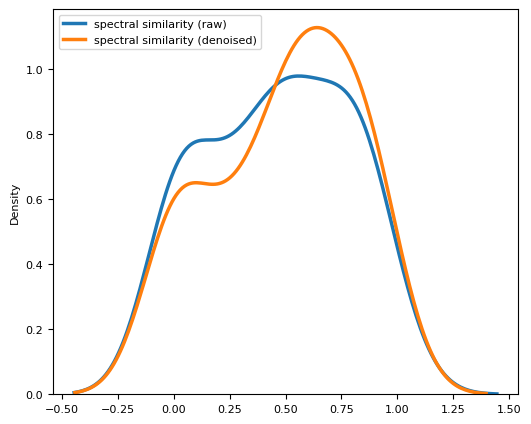

In [480]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (6, 5))#43
ax = fig.add_subplot()
sns.kdeplot(entropy_raw, label = 'spectral similarity (raw)', linewidth=2.5)
sns.kdeplot(entropy_denoised, label = 'spectral similarity (denoised)', linewidth=2.5)
# sns.kdeplot(diff, label = 'spectral similarity (denoised)', linewidth=2.5)
plt.legend()